In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [3]:
# Read data
filename = "../MyData/HTRU_2.csv"
df = pd.read_csv(filename)

raw_data = df.values

cols = range(0, 9)
X = raw_data[:, cols]
# Column of platelets has to be divided with 1000,mistake in data

attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:, -1]  # -1 takes the last column

classNames = np.unique(classLabels)

classDict = dict(zip(classNames, range(len(classNames))))

y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape

C = len(classNames)

classDict = dict(zip(range(1,8), classNames))

In [4]:
#       For statistical results-Part 2 of Report

for column_index in range(X.shape[1]):
    column_mean = np.mean(X[:, column_index])
    column_std = np.std(X[:, column_index], ddof=1)
    column_median = np.median(X[:, column_index])
    column_range = np.max(X[:, column_index]) - np.min(X[:, column_index])
    print(f"Attribute {attributeNames[column_index]}")
    print(f"Mean : {column_mean}")
    print(f"Standar Deviation : {column_std}")
    print(f"Median : {column_median}")
    print(f"Range: {column_range}")
    print()


Attribute Profile_mean
Mean : 111.07996834492681
Standar Deviation : 25.652935359860106
Median : 115.078125
Range: 186.8046875

Attribute Profile_stdev
Mean : 46.54953156153424
Standar Deviation : 6.843189410087772
Median : 46.94747911
Range: 74.00686891000001

Attribute Profile_skewness
Mean : 0.47785725810191076
Standar Deviation : 1.0640397163731556
Median : 0.22324002399999998
Range: 9.945533226999999

Attribute Profile_kurtosis
Mean : 1.7702789980713487
Standar Deviation : 6.167913247731735
Median : 0.19871040099999998
Range: 69.89350771100001

Attribute DM_mean
Mean : 12.614399658311543
Standar Deviation : 29.472897150065176
Median : 2.801839465
Range: 223.178929798

Attribute DM_stdev
Mean : 26.326514703918594
Standar Deviation : 19.470572330539163
Median : 18.461315589999998
Range: 103.271778435

Attribute DM_skewness
Mean : 8.303556116638282
Standar Deviation : 4.506091858992771
Median : 8.433514689
Range: 37.679113801

Attribute DM_kurtosis
Mean : 104.85770870366203
Standar D

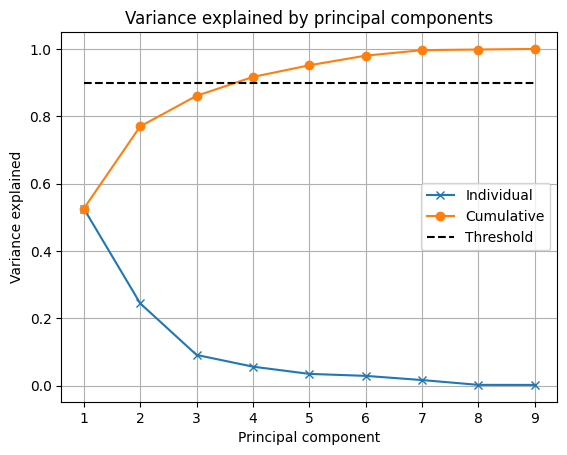

In [6]:
#       OURS!

Y = (X - np.ones((N, 1)) * X.mean(axis=0))/np.std(X, axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

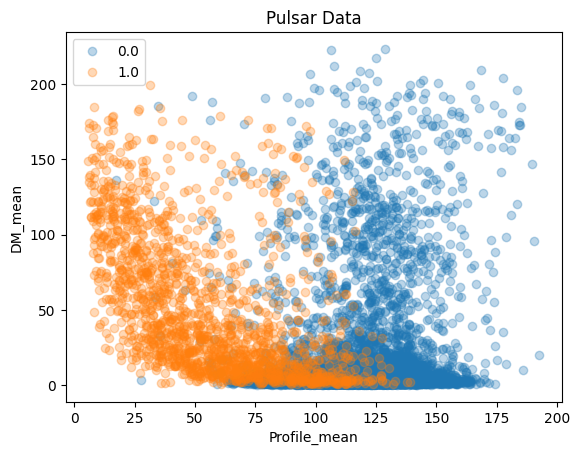

In [11]:
#Plot 2 attributes
i = 0       #first attribute
j = 4       #fifth attribute

f = figure()
title('Pulsar Data')

for c in classNames:
    # select indices belonging to class c:
    class_mask = y==c
    plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)


legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()

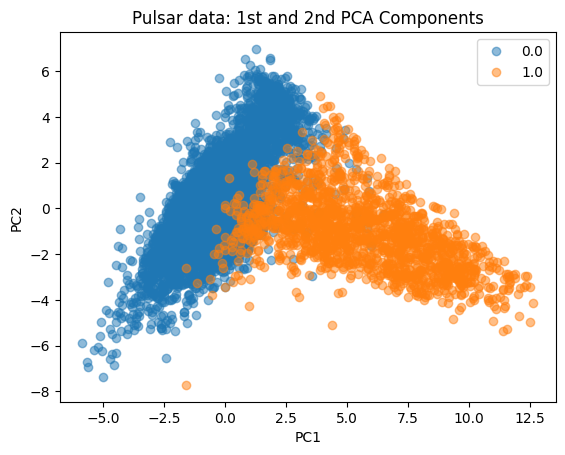

In [12]:
# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('Pulsar data: 1st and 2nd PCA Components')
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

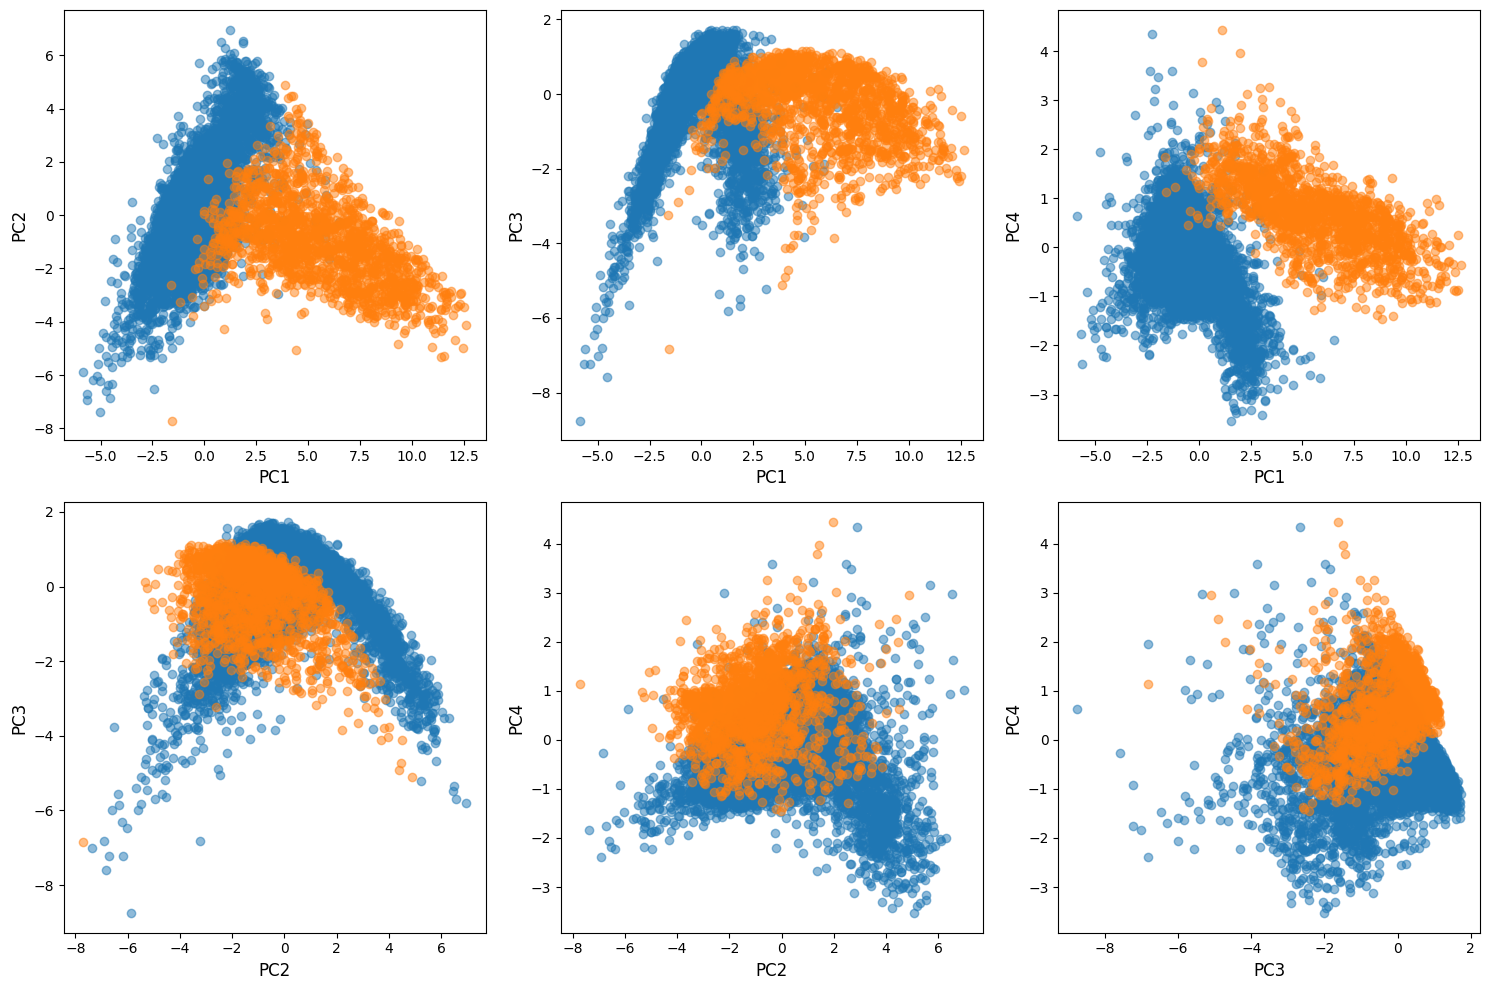

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

i = 0
j = 1

for index in range(6):
  ax = axes[index]
  for c in classNames:
      # select indices belonging to class c:
      class_mask = y==c
      ax.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
      ax.set_ylabel('PC{0}'.format(j+1), fontsize=12)
      ax.set_xlabel('PC{0}'.format(i+1), fontsize=12)
  #Do not repeat plots
  j+=1
  if j == 4:
    i = i+1
    if (i<3): j = i+1
    else: j = 3

plt.tight_layout()
show()

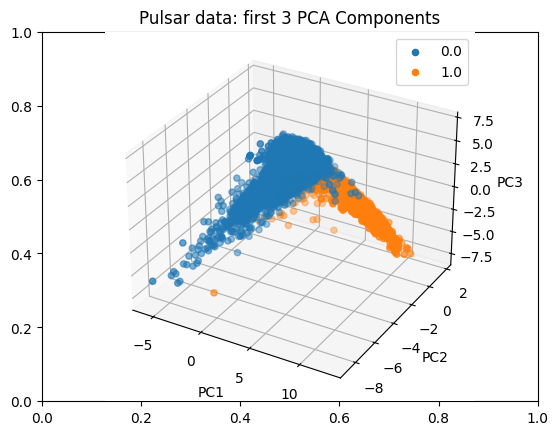

In [33]:
# Indices of the principal components to be plotted
i = 0
j = 1
k = 2

# Plot PCA of the data
f = figure()
title('Pulsar data: first 3 PCA Components')
ax = plt.axes(projection='3d')

for c in classNames:
    # select indices belonging to class c:
    class_mask = y==c
    ax.scatter(Z[class_mask,i],Z[class_mask,k],Z[class_mask,j])
    # plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
ax.set_xlabel('PC{0}'.format(i+1))
ax.set_ylabel('PC{0}'.format(j+1))
ax.set_zlabel('PC{0}'.format(k+1))

# Output result to screen
show()

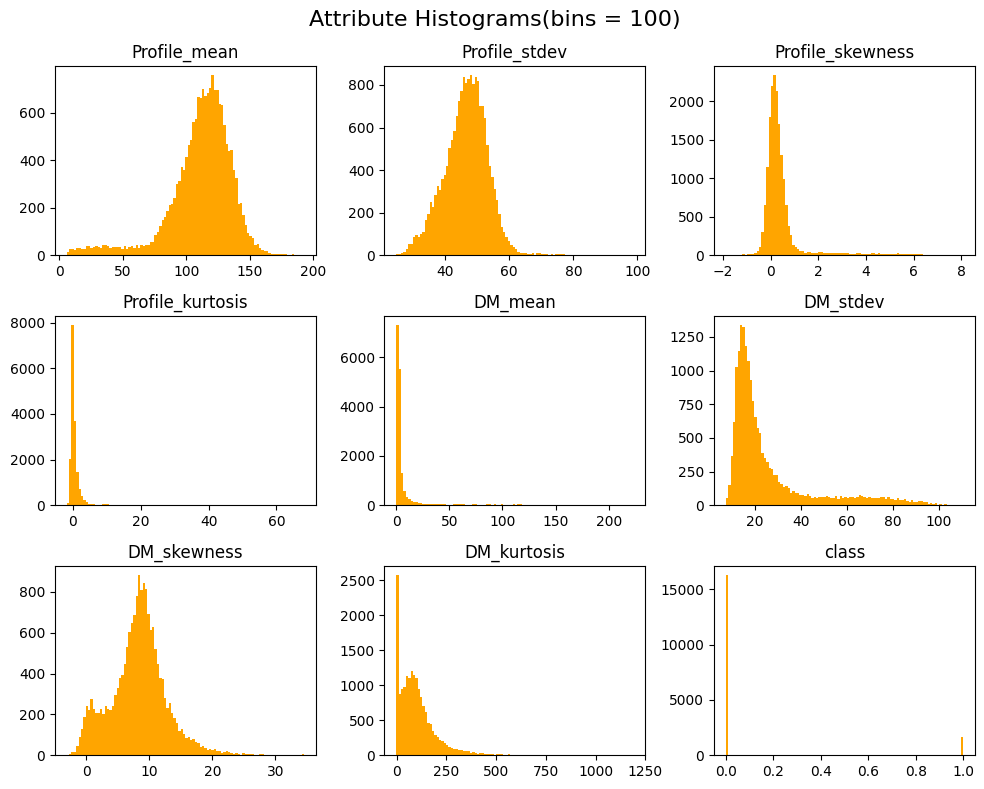

In [34]:
data = [np.random.randn(1000) for _ in range(9)]

# Create a 3x3 grid of subplots for histograms
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
beans = 100

# Create histograms for each subplot
for i in range(9):
    ax = axes[i]
    ax.hist(X[:,i], bins=beans, color='orange')
    ax.set_title(attributeNames[i])

# Add a title for the entire grid of histograms
fig.suptitle(f'Attribute Histograms(bins = {beans})', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

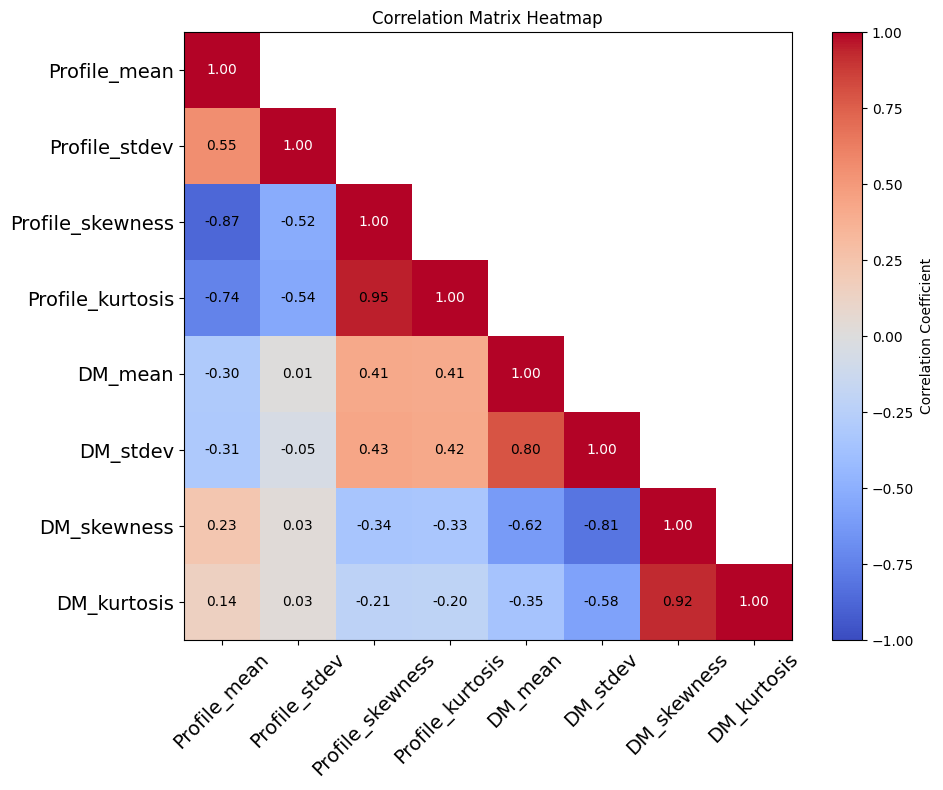

In [51]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X[:, :8], rowvar=False)

# Create a heatmap of the correlation matrix
mask = np.ones_like(correlation_matrix, dtype=bool)

for i in range(8):
    for j in range(8):
        if i < j:
          mask[i, j] = False
        else:
          pass

plt.figure(figsize=(10, 8))

heatmap = plt.imshow(np.ma.masked_array(correlation_matrix, mask=~mask), cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

plt.colorbar(heatmap, label='Correlation Coefficient')
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(attributeNames)-1), attributeNames[:-1], fontsize=14)
plt.yticks(range(len(attributeNames)-1), attributeNames[:-1], fontsize=14)
for i in range(8):
    for j in range(8):
        if i <= j:
          plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='white')
          ax.text(3,3, correlation_matrix[3,3],fontsize=24)
        elif i < j:
          pass
        else:
          plt.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='black')
          ax.text(3,3, correlation_matrix[3,3],fontsize=24)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
print(correlation_matrix)

[[ 1.         -0.19343619 -0.1281183  -0.40567065 -0.54000993 -0.28789999
   0.81249494  0.00106227  0.14579139]
 [-0.19343619  1.         -0.27648648  0.15792795 -0.06851863 -0.26551982
  -0.27531369  0.32723299 -0.2408022 ]
 [-0.1281183  -0.27648648  1.         -0.48003548 -0.16035861  0.00939694
  -0.44455925 -0.49214882  0.08690557]
 [-0.40567065  0.15792795 -0.48003548  1.         -0.00922566  0.32448368
  -0.26037208  0.47893595 -0.07645643]
 [-0.54000993 -0.06851863 -0.16035861 -0.00922566  1.         -0.19768439
  -0.21014149 -0.10436063 -0.09767426]
 [-0.28789999 -0.26551982  0.00939694  0.32448368 -0.19768439  1.
  -0.31864938 -0.04379007 -0.00958634]
 [ 0.81249494 -0.27531369 -0.44455925 -0.26037208 -0.21014149 -0.31864938
   1.         -0.11312117  0.12467379]
 [ 0.00106227  0.32723299 -0.49214882  0.47893595 -0.10436063 -0.04379007
  -0.11312117  1.         -0.05972902]
 [ 0.14579139 -0.2408022   0.08690557 -0.07645643 -0.09767426 -0.00958634
   0.12467379 -0.05972902  1. 